# The Contaminated U.S. Labour Market by COVID-19: Unemployment Spikes and Spreading Speed of the Novel Coronavirus

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from statsmodels.api import OLS

### Note on data file format:
all_data.csv: full data from January to July (week1 to 28), feature variables are in categorical format, with sector%.
<br>data(2): data from January to June (week1 to 23), feature variables are in categorical format, with sector%, used as training set for MLP model.</br>
<br>test_data(2): data for July (week 24 to 28), test set for MLP model.</br>
<br>panelols_data(2): panel data from January (week 1 to 23), $COVID_{s,t}$ in numeric form.</br>
<br>planelols_test_data: panel data for July (week 24 to 28), used as test set for panelOLS.</br>


## 1.1 Linear Regression on Full Dataset

In [84]:
df_full = pd.read_csv('all_data.csv')
pd.set_option('display.max_columns', 157)
df_full.head(30)

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,WEEK24,WEEK25,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %
0,2129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2170,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
3,1981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
4,1735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
5,1575,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Exploratory Data Analysis on Variables

In [4]:
# Y_(s,t)
df_full['Y_(s,t)'].describe()

count    1.484000e+03
mean     3.546630e+04
std      7.121690e+04
min      6.000000e+00
25%      2.996250e+03
50%      1.113050e+04
75%      3.355550e+04
max      1.058325e+06
Name: Y_(s,t), dtype: float64

### Correlation between Feature Variables and Target Variable:

In [98]:
# check the correlation between target variable and COVID cases in panel dataset
print(df_plols3[['Y_(s,t)','COVID_(s,t)']].corr())

              Y_(s,t)  COVID_(s,t)
Y_(s,t)      1.000000     0.479236
COVID_(s,t)  0.479236     1.000000


In [111]:
# check the correlation between sector numbers and Y in panel dataset
for sector in df_plols3.keys()[-21:]:
    corrMatrix = df_plols3[['Y_(s,t)',sector]].corr()
    print(corrMatrix)

                                           Y_(s,t)  \
Y_(s,t)                                   1.000000   
Agriculture/Forestry/Fishing and Hunting  0.430081   

                                          Agriculture/Forestry/Fishing and Hunting  
Y_(s,t)                                                                   0.430081  
Agriculture/Forestry/Fishing and Hunting                                  1.000000  
          Y_(s,t)    Mining
Y_(s,t)  1.000000  0.175044
Mining   0.175044  1.000000
            Y_(s,t)  Utilities
Y_(s,t)    1.000000   0.468807
Utilities  0.468807   1.000000
               Y_(s,t)  Construction
Y_(s,t)       1.000000      0.564323
Construction  0.564323      1.000000
                Y_(s,t)  Manufacturing
Y_(s,t)        1.000000       0.363392
Manufacturing  0.363392       1.000000
                  Y_(s,t)  Wholesale Trade
Y_(s,t)          1.000000         0.524329
Wholesale Trade  0.524329         1.000000
               Y_(s,t)  Retail Trade
Y_(s,t)    

In [110]:
# check the correlation between sector and COVID cases in panel dataset
for sector in df_plols3.keys()[-21:]:
    corrMatrix = df_plols3[['COVID_(s,t)',sector]].corr()
    print(corrMatrix)

                                          COVID_(s,t)  \
COVID_(s,t)                                  1.000000   
Agriculture/Forestry/Fishing and Hunting     0.186092   

                                          Agriculture/Forestry/Fishing and Hunting  
COVID_(s,t)                                                               0.186092  
Agriculture/Forestry/Fishing and Hunting                                  1.000000  
             COVID_(s,t)    Mining
COVID_(s,t)     1.000000  0.222353
Mining          0.222353  1.000000
             COVID_(s,t)  Utilities
COVID_(s,t)     1.000000   0.398317
Utilities       0.398317   1.000000
              COVID_(s,t)  Construction
COVID_(s,t)       1.00000       0.67339
Construction      0.67339       1.00000
               COVID_(s,t)  Manufacturing
COVID_(s,t)       1.000000       0.319384
Manufacturing     0.319384       1.000000
                 COVID_(s,t)  Wholesale Trade
COVID_(s,t)         1.000000         0.684417
Wholesale Trade     0.

## 1.1 Fit the Linear Regression using Y_(s,t)

In [6]:
# Fit the linear regression
lm = LinearRegression()
X = df_full[df_full.keys()[1:]]
Y = df_full['Y_(s,t)']
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Model Goodness of Fit
Yhat = lm.predict(X)
print('The model fit is: ', lm.score(X,Y))   # R_squared

The model fit is:  0.6850673087443357


### Regression Summary Statistics

In [8]:
from statsmodels.api import OLS
OLS(Y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y_(s,t)   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     18.91
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          3.49e-242
Time:                        23:57:03   Log-Likelihood:                -17829.
No. Observations:                1484   AIC:                         3.597e+04
Df Residuals:                    1330   BIC:                         3.678e+04
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
COVID_(s,t)                                                         -4720.2923   2988.104     -1.580      0.114   -1.06e+04    1141.618
Alabama                                                              2.213e+04   1.92e+04      1.152      0.250   -1.56e+04    5.98e+04
Alaska                                                              -7.614e+04    3.2e+04     -2.381      0.017   -1.39e+05   -1.34e+04
Arkansas                                                             -1.82e+04   2.05e+04     -0.886      0.376   -5.85e+04    2.21e+04
Arizona                                                              6.554e+04   2.06e+04      3.179      0.002    2.51e+04    1.06e+05
California                                                           3.095e+05   3.76e+04      8.223      0.000    2.36e+05    3.83e+05
Colorado                                                            -1.011e+04   2.05e+04     -0.494      0.622   -5.03e+04    3.01e+04
Connecticut                                                         -2.421e+04    1.9e+04     -1.277      0.202   -6.14e+04     1.3e+04
Delaware                                                             1.394e+05   2.97e+04      4.685      0.000     8.1e+04    1.98e+05
District of Columbia                                                -1.221e+05   3.34e+04     -3.661      0.000   -1.88e+05   -5.67e+04
Florida                                                              6.799e+04   2.15e+04      3.156      0.002    2.57e+04     1.1e+05
Georgia                                                              2.798e+05   3.87e+04      7.225      0.000    2.04e+05    3.56e+05
Hawaii                                                              -9.584e+04    2.4e+04     -3.994      0.000   -1.43e+05   -4.88e+04
Idaho                                                               -5895.2605   2.18e+04     -0.271      0.786   -4.86e+04    3.68e+04
Illinois                                                             1.458e+04   1.96e+04      0.742      0.458    -2.4e+04    5.31e+04
Indiana                                                              9889.4555   2.15e+04      0.459      0.646   -3.24e+04    5.21e+04
Iowa                                                                -3.331e+04   2.12e+04     -1.572      0.116   -7.49e+04    8247.716
Kansas                                                              -1.814e+04   1.88e+04     -0.963      0.336   -5.51e+04    1.88e+04
Kentucky                                                             3416.0726      2e+04      0.171      0.864   -3.58e+04    4.27e+04
Louisiana                                                            2.206e+04   1.86e+04  

### Compare the distribution of actual weekly initial UI claims, $Y_{(s,t)}$, with the predicted $Y$ value distribution

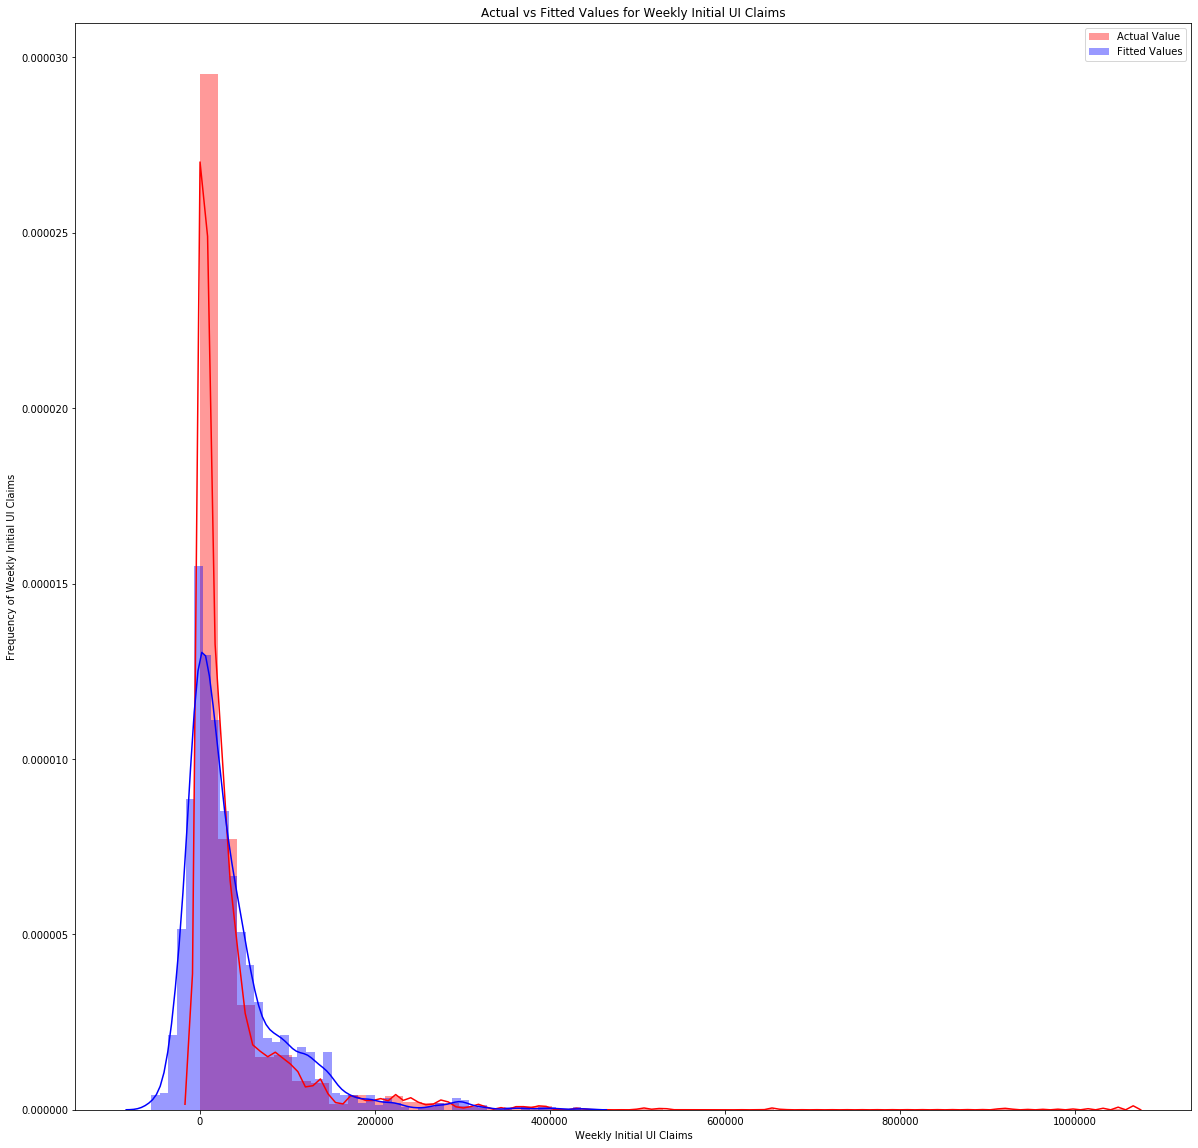

In [9]:
import seaborn as sns
%matplotlib inline

width = 20
height = 20
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_full['Y_(s,t)'], hist=True, color="r", label="Actual Value")
sns.distplot(Yhat, hist=True, color="b", label="Fitted Values" , ax=ax1)    # ax=ax1 so that two graphs overlay


plt.title('Actual vs Fitted Values for Weekly Initial UI Claims')
plt.xlabel('Weekly Initial UI Claims')
plt.ylabel('Frequency of Weekly Initial UI Claims')

plt.legend()
plt.show()
plt.close()

A significant underestimation for $Y_{(s,t)}$ around 0 cases can be observed under the linear regression.

## Exploratory Data Analysis

### Y time series / line plot to check for its linearity
use panel data Y & Week
<br> extract a new df containing only Y, Week</br>
<br> make Week the index, Y the value</br>

In [51]:
df_timeseries = df_plols3[['Y_(s,t)', 'Week', 'State']]
df_timeseries.head()

,"Y_(s,t)",Week,State
0,2129,1,Alabama
1,2170,2,Alabama
2,2176,3,Alabama
3,1981,4,Alabama
4,1735,5,Alabama


In [58]:
df_timeseries[['Y_(s,t)', 'State']].groupby(['State']).mean()

,"Y_(s,t)"
State,
Alabama,27745.913043
Alaska,6317.652174
Arizona,32896.043478
Arkansas,12469.826087
California,273371.869565
Colorado,21520.304348
Connecticut,19785.173913
Delaware,5215.086957
District of Columbia,5131.869565


In [82]:
# Maximum weekly initial UI Claims for each State
df_timeseries[['Y_(s,t)', 'State']].groupby(['State']).describe()

Y_(s,t)                                                  \
                       count           mean            std      min      25%   
State                                                                          
Alabama                 23.0   27745.913043   31096.454827   1575.0   2149.5   
Alaska                  23.0    6317.652174    4550.669058    773.0   1061.5   
Arizona                 23.0   32896.043478   34886.324601   3086.0   3721.5   
Arkansas                23.0   12469.826087   14203.602477   1055.0   1780.5   
California              23.0  273371.869565  277213.401212  34979.0  44527.0   
Colorado                23.0   21520.304348   26332.251147   1681.0   2265.0   
Connecticut             23.0   19785.173913   22036.933763   2435.0   2971.5   
Delaware                23.0    5215.086957    5651.175042    472.0    627.0   
District of Columbia    23.0    5131.869565    4994.036592    422.0    536.5   
Florida                 23.0  131421.695652  136198.414203   4853.0   5531.0   
Georgia                 23.0  125483.086957  116807.563826   4569.0   5557.5   
Hawaii                  23.0   12565.478261   14966.383503   1014.0   1237.0   
Idaho                   23.0    7509.043478    8964.183168    938.0   1444.5   
Illinois                23.0   63444.521739   57875.269261   8045.0  10549.5   
Indiana                 23.0   37412.521739   40990.287892   2223.0   2967.5   
Iowa                    23.0   16740.347826   18330.523850   2221.0   2848.5   
Kansas                  23.0   14051.217391   14965.212263   1365.0   2091.5   
Kentucky                23.0   45299.913043   41428.497976   2223.0   2799.0   
Louisiana               23.0   33579.260870   34355.340067   1509.0   1968.0   
Maine                   23.0    7504.260870    8558.120228    634.0    871.5   
Maryland                23.0   32307.043478   28934.217965   2626.0   3243.0   
Massachusetts           23.0   48498.695652   50772.201181   4712.0   6735.5   
Michigan                23.0   73941.130435  102007.087779   5150.0   6748.0   
Minnesota               23.0   36143.391304   37871.699149   3410.0   3970.5   
Mississippi             23.0   17104.478261   15000.554274    744.0    980.5   
Missouri                23.0   31361.826087   32139.826655   2732.0   4408.5   
Montana                 23.0    5538.260870    6413.444027    695.0    921.5   
Nebraska                23.0    6834.478261    7566.230981    493.0    814.0   
Nevada                  23.0   23685.173913   27301.266387   2052.0   2668.5   
New Hampshire           23.0   10133.652174   11414.475597    424.0    609.5   
New Jersey              23.0   57899.695652   63918.709937   7773.0   9306.5   
New Mexico              23.0    8094.782609    8208.956527    681.0    826.5   
New York                23.0  130873.782609  120868.049942  14035.0  15783.5   
North Carolina          23.0   50844.260870   51710.761796   1767.0   3438.5   
North Dakota            23.0    3583.521739    4053.432853    363.0    491.5   
Ohio                    23.0   65061.521739   77131.296358   6208.0   7707.5   
Oklahoma                23.0   35088.086957   30168.248763   1458.0   1804.5   
Oregon                  23.0   23786.260870   18930.681917   3514.0   4655.0   
Pennsylvania            23.0   82199.782609  106062.712583  12045.0  14932.0   
Puerto Rico             23.0   14598.608696   16758.864574   1172.0   1884.0   
Rhode Island            23.0    8367.000000   10572.008986    700.0   1078.0   
South Carolina          23.0   28889.217391   28981.974801   1824.0   2096.0   
South Dakota            23.0    2482.434783    2603.220136    159.0    220.0   
Tennessee               23.0   28921.130435   30646.278511   1855.0   2423.0   
Texas                   23.0  121268.826087  104704.850600  12047.0  14112.0   
Utah                    23.0    8654.434783    9607.161807    885.0   1296.5   
Vermont                 23.0    3475.130435    4439.469423    446.0    634.5   
Virgin Islands       

In [94]:
#Top 10 weeks in weekly initial UI Claims, with State ranking top5: California, Florida, New York, Georigia, and Michigan.
temp_ts = df_timeseries.set_index(['State'])
temp_ts.sort_values(['Y_(s,t)'], ascending=False, axis=0, inplace=True)
temp_ts.head(10)

,"Y_(s,t)",Week
State,,
California,1058325,10
California,918814,11
California,655472,12
California,528360,13
Florida,506670,13
Florida,433103,14
New York,394701,12
Georgia,390132,11
Michigan,388554,11


### Top 5 State UI Claimants Characteristics on Sector Compositions:

In [135]:
# check sector related information
sectors = df_plols3.keys()[-21:]
df_sector = df_plols3.drop(df_plols3.columns[-21:], axis=1)
df_sector.head()

,"Y_(s,t)",State,Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %
0,2129,Alabama,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2170,Alabama,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2176,Alabama,3,0,3,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
3,1981,Alabama,4,0,4,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
4,1735,Alabama,5,0,5,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8


In [149]:
temp_sector0 = df_sector.set_index(['State'])
temp_sector0.sort_values(['Y_(s,t)'], ascending=False, axis=0, inplace=True)
temp_sector0.head(20)

,"Y_(s,t)",Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %
State,,,,,,,,,,,,,,,,,,,,,,,,,
California,1058325,10,3698,10,16.4,0.2,0.2,8.4,7.6,1.4,6.4,1.9,5.6,1.7,0.6,2.0,0.0,6.7,2.4,5.3,1.1,3.1,1.9,0.7,10.0
California,918814,11,7727,11,3.2,0.1,0.2,4.7,5.4,1.3,12.9,2.2,5.4,0.8,0.8,1.3,0.0,4.5,3.4,8.6,1.6,6.9,4.9,0.3,28.3
California,655472,12,8880,12,3.2,0.1,0.2,4.7,5.4,1.3,12.9,2.2,5.4,0.8,0.8,1.3,0.0,4.5,3.4,8.6,1.6,6.9,4.9,0.3,28.3
California,528360,13,8794,13,3.2,0.1,0.2,4.7,5.4,1.3,12.9,2.2,5.4,0.8,0.8,1.3,0.0,4.5,3.4,8.6,1.6,6.9,4.9,0.3,28.3
Florida,506670,13,6998,13,0.1,0.0,0.0,2.3,2.3,2.3,11.5,2.5,1.0,0.8,2.1,3.7,1.3,10.7,1.8,9.7,4.5,25.2,4.9,0.4,12.8
Florida,433103,14,5347,14,0.1,0.0,0.0,2.3,2.3,2.3,11.5,2.5,1.0,0.8,2.1,3.7,1.3,10.7,1.8,9.7,4.5,25.2,4.9,0.4,12.8
New York,394701,12,67193,12,0.1,0.1,0.0,8.8,4.4,3.0,12.5,4.2,3.5,0.8,1.5,3.3,0.4,8.6,2.4,10.1,3.5,18.2,5.5,0.6,8.2
Georgia,390132,11,3794,11,0.2,0.0,0.0,3.5,12.9,2.6,8.5,3.6,2.1,0.9,1.0,4.0,0.4,14.1,3.2,14.0,4.0,18.4,4.5,0.5,1.5
Michigan,388554,11,9845,11,0.3,0.2,0.0,9.7,26.4,4.5,10.2,3.0,0.6,0.6,1.2,4.5,4.0,7.3,0.9,9.0,1.3,8.4,4.1,0.5,3.0


In [148]:
# a snapshot of the top ranking sector% for top5 States
temp_sector = df_sector.set_index(['State'])
temp_sector.sort_values(['Y_(s,t)'], ascending=False, axis=0, inplace=True)
temp_sector.drop(['COVID_(s,t)','State_i x t','Mining %','Utilities %','Construction %','Other Services (except Public Administration) %','Information Not Available %','Wholesale Trade %','Finance and Insurance %','Real Estate, Rental and Leasing %','Public Administration %','Agriculture/Forestry/Fishing and Hunting %','Management of Companies and Enterprises %','Professional/Scientific/Technical Services %'], axis=1, inplace=True)

temp_sector.head(20)

,"Y_(s,t)",Week,Manufacturing %,Retail Trade %,Transporation and Warehousing %,Information %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %
State,,,,,,,,,,,
California,1058325,10,7.6,6.4,1.9,5.6,6.7,2.4,5.3,1.1,3.1
California,918814,11,5.4,12.9,2.2,5.4,4.5,3.4,8.6,1.6,6.9
California,655472,12,5.4,12.9,2.2,5.4,4.5,3.4,8.6,1.6,6.9
California,528360,13,5.4,12.9,2.2,5.4,4.5,3.4,8.6,1.6,6.9
Florida,506670,13,2.3,11.5,2.5,1.0,10.7,1.8,9.7,4.5,25.2
Florida,433103,14,2.3,11.5,2.5,1.0,10.7,1.8,9.7,4.5,25.2
New York,394701,12,4.4,12.5,4.2,3.5,8.6,2.4,10.1,3.5,18.2
Georgia,390132,11,12.9,8.5,3.6,2.1,14.1,3.2,14.0,4.0,18.4
Michigan,388554,11,26.4,10.2,3.0,0.6,7.3,0.9,9.0,1.3,8.4


### Time Series Plot for $Y_{s,t}$:

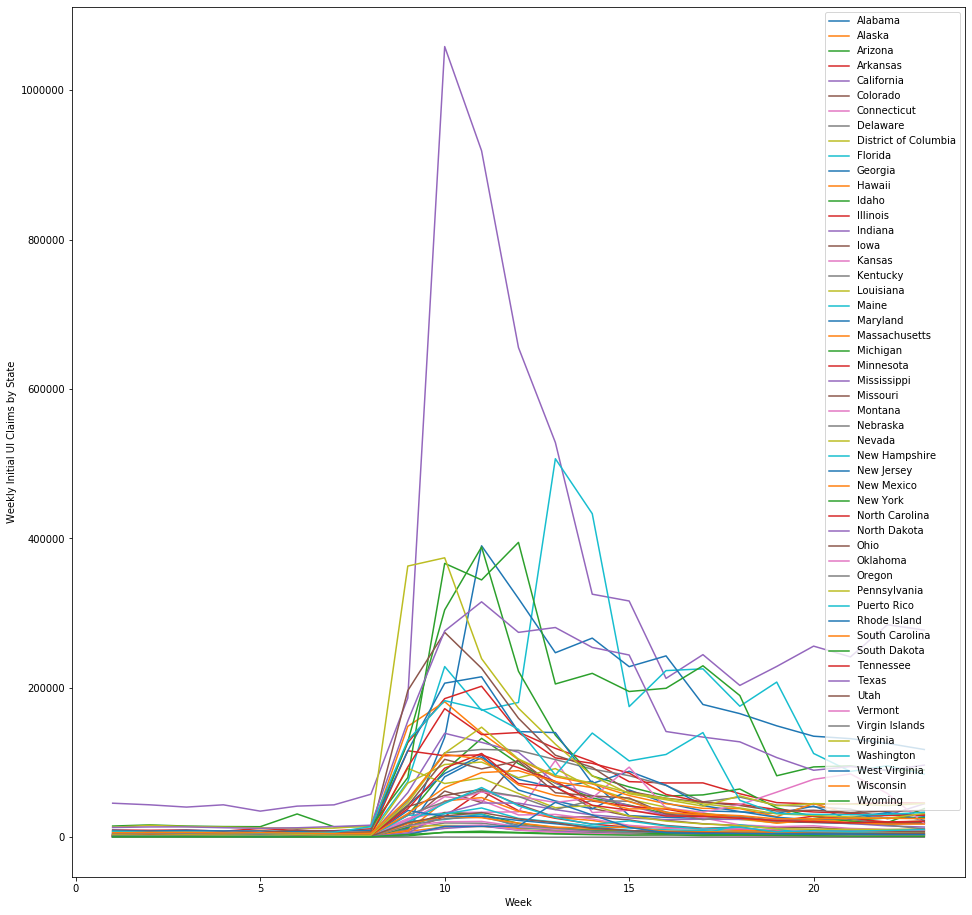

In [70]:
fig, ax = plt.subplots()
for key, grp in df_timeseries.groupby(['State']):
    ax = grp.plot(ax=ax, kind='line', figsize=(16, 16), x='Week', y='Y_(s,t)', label=key)
plt.ylabel('Weekly Initial UI Claims by State')
plt.legend(loc='upper right')

We noticed the nonlinearity of $Y_{s,t}$ and thus see it fit to take the natural logarithm of the dependent variable before proceeding with regression. The motivation behind the transformation is to reduce the dynamic ranges of the target variable into comparable values whilst maintaining the notion of distance.

## 1.2 Transform Y_(s,t) into natural log, re-run the regression

In [85]:
df_full['logY'] = np.log(df_full['Y_(s,t)'])
df_full.head()

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,...,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %,logY
0,2129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.663408
1,2170,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.682482
2,2176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.685244
3,1981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.591357
4,1735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.458763


### Re-fit the linear regression

In [86]:
lml = LinearRegression()
X = df_full[df_full.keys()[1:-1]]
y = df_full['logY']
lml.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Model Goodness of Fit
yhat = lml.predict(X)
print('The model fit is: ', lml.score(X,y))   # R_squared

The model fit is:  0.9747947401316183


### Summary Statistics

In [13]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logY   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     336.2
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:02:29   Log-Likelihood:                -222.85
No. Observations:                1484   AIC:                             753.7
Df Residuals:                    1330   BIC:                             1570.
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
COVID_(s,t)                                                            -0.0069      0.021     -0.330      0.742      -0.048       0.034
Alabama                                                                 1.1060      0.135      8.178      0.000       0.841       1.371
Alaska                                                                 -0.5381      0.225     -2.391      0.017      -0.980      -0.097
Arkansas                                                                0.7745      0.145      5.356      0.000       0.491       1.058
Arizona                                                                 1.3720      0.145      9.455      0.000       1.087       1.657
California                                                              3.0994      0.265     11.701      0.000       2.580       3.619
Colorado                                                                1.0105      0.144      7.014      0.000       0.728       1.293
Connecticut                                                             1.2346      0.133      9.255      0.000       0.973       1.496
Delaware                                                                0.1763      0.209      0.842      0.400      -0.234       0.587
District of Columbia                                                   -0.2948      0.235     -1.255      0.210      -0.755       0.166
Florida                                                                 1.9676      0.152     12.979      0.000       1.670       2.265
Georgia                                                                 3.1510      0.273     11.561      0.000       2.616       3.686
Hawaii                                                                  0.1738      0.169      1.029      0.304      -0.158       0.505
Idaho                                                                  -0.0576      0.153     -0.376      0.707      -0.358       0.243
Illinois                                                                2.4977      0.138     18.068      0.000       2.227       2.769
Indiana                                                                 1.5859      0.152     10.464      0.000       1.289       1.883
Iowa                                                                    1.0643      0.149      7.139      0.000       0.772       1.357
Kansas                                                                  0.8770      0.133      6.616      0.000       0.617       1.137
Kentucky                                                                1.3760      0.141      9.775      0.000       1.100       1.652
Louisiana                                                               0.9807      0.131  

### Compare the distribution of actual weekly initial UI claims, $Y_{(s,t)}$, with the predicted $Y$ value distribution

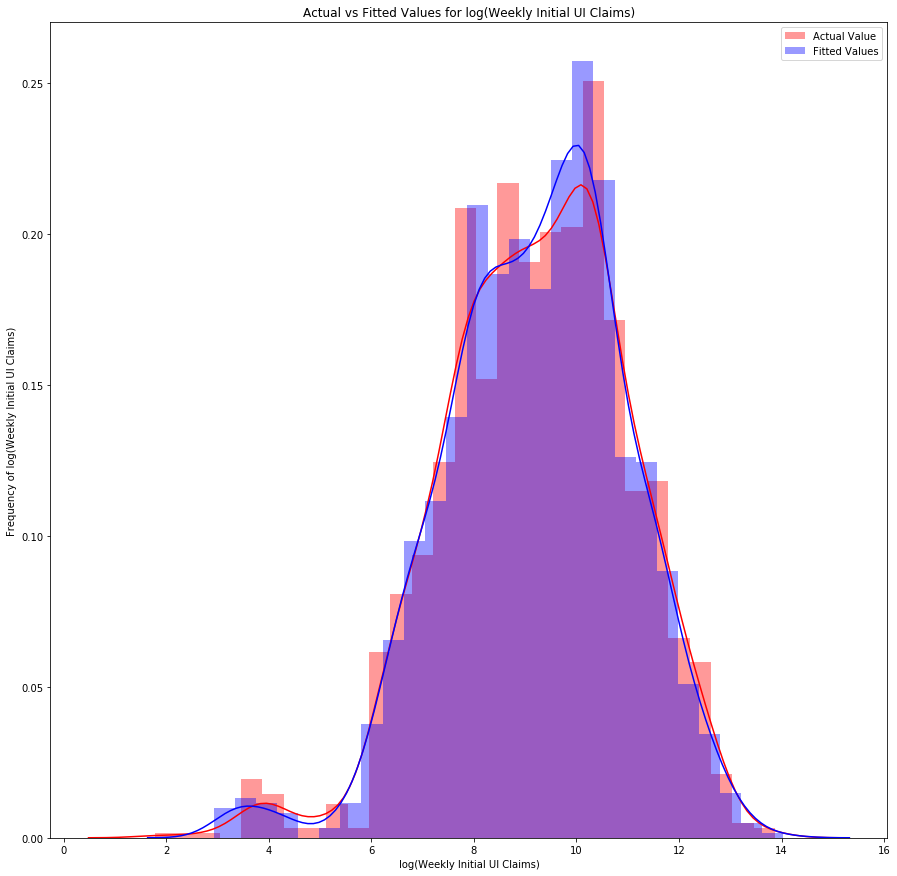

In [90]:
import seaborn as sns
%matplotlib inline

width = 15
height = 15
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_full['logY'], hist=True, color="r", label="Actual Value")
sns.distplot(yhat, hist=True, color="b", label="Fitted Values" , ax=ax1)    # ax=ax1 so that two graphs overlay


plt.title('Actual vs Fitted Values for log(Weekly Initial UI Claims)')
plt.xlabel('log(Weekly Initial UI Claims)')
plt.ylabel('Frequency of log(Weekly Initial UI Claims)')

plt.legend()
plt.show()
plt.close()

## Train Test Split, test for the linear regression model predictive power

Potential overfitting problem is spotted in the linear regression model, which has R-Squared as high as 97.5%.We stopped there and explored with machine learning options using MLP method for target variable prediction.

## 2. Multi-Layer Perceptron (MLP)

In [151]:
df_mlpt = pd.read_csv('data(2).csv')    # read the training set into dataframe 'df_mlpt'
df_mlpt.head()

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,WEEK24,WEEK25,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %
0,2129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2170,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
3,1981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8
4,1735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8


In [152]:
df_mlp_test = pd.read_csv('test_data(2).csv')    #read test set into the dataframe as 'df_mlp_test'
df_mlp_test.head()

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,WEEK24,WEEK25,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %
0,19056,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3
1,20563,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3
2,23676,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3
3,17437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3
4,11690,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3


In [155]:
df_mlpt['logY'] = np.log(df_mlpt['Y_(s,t)'])   # add variable logY to the dataset
df_mlpt.head()

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,...,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %,logY
0,2129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.663408
1,2170,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.682482
2,2176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.685244
3,1981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.591357
4,1735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.8,0.2,12.4,17.7,3.4,8.6,3.6,0.9,3.4,1.6,4.1,0.2,14.1,1.5,6.9,0.6,4.5,2.1,0.9,10.8,7.458763


In [156]:
df_mlp_test['logY'] = np.log(df_mlp_test['Y_(s,t)'])   # add variable logY to the dataset
df_mlp_test.head()

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,WEEK20,WEEK21,WEEK22,WEEK23,...,WEEK26,WEEK27,WEEK28,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,Wholesale Trade %,Retail Trade %,Transporation and Warehousing %,Information %,Finance and Insurance %,"Real Estate, Rental and Leasing %",Professional/Scientific/Technical Services %,Management of Companies and Enterprises %,Administration and Support/Waste Management and Remedial Services %,Educational Services %,Healthcare and Social Assistance %,"Arts, Entertainment and Recreation %",Accomodation and Food Services %,Other Services (except Public Administration) %,Public Administration %,Information Not Available %,logY
0,19056,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3,9.855137
1,20563,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3,9.931249
2,23676,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3,10.072217
3,17437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3,9.766350
4,11690,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,0.1,3.2,9.8,1.8,8.4,2.1,0.6,0.8,0.8,2.1,0.4,11.4,2.0,6.8,1.3,14.0,2.0,0.7,31.3,9.366489


In [158]:
# Train the regression model with 5 hidden layers

X = df_mlpt[df_mlpt.keys()[1:-1]]
Y = df_mlpt['logY'] 
X_test = df_mlp_test[df_mlp_test.keys()[1:-1]] 
Y_test = df_mlp_test['logY']

regr = MLPRegressor(random_state=1, alpha=0.1, hidden_layer_sizes=(50,30,30,10,5), \
                    max_iter=10000).fit(X.values, Y.values.ravel())
Y_pred = regr.predict(X)

print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Y_test_pred = regr.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_test_pred))
    
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_test_pred))


Mean squared error: 0.04
Coefficient of determination: 0.99
Mean squared error: 0.57
Coefficient of determination: 0.72


Under the MLP machine learning algorithm, the model prediction accuracy reaches an $R^2$ of 72% for test set. That is to say, the model can forecast the target variable, the number of weekly initial claims, at a satisfactory level of accuracy.  

## 3. Panel data format, visualization. Use `panelols` regression package and compare regression results.  
<br>Entity effects & time effects</br>
<br>Data from Jan to June</br>

In [11]:
df_plols3 = pd.read_csv('panelols_data(2).csv')
df_plols3.head(25)

,"Y_(s,t)",State,Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,...,Professional/Scientific/Technical Services,Management of Companies and Enterprises,Administration and Support/Waste Management and Remedial Services,Educational Services,Healthcare and Social Assistance,"Arts, Entertainment and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Information Not Available
0,2129,Alabama,1,0,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2170,Alabama,2,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2176,Alabama,3,0,3,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
3,1981,Alabama,4,0,4,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
4,1735,Alabama,5,0,5,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
5,1575,Alabama,6,0,6,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
6,1663,Alabama,7,0,7,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
7,1819,Alabama,8,7,8,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
8,10892,Alabama,9,124,9,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
9,80984,Alabama,10,563,10,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029


## normalize COVID_(s,t) using `sklearn.preprocessing.StandardScaler`

In [4]:
SCALE = StandardScaler()
SCALE.fit(df_plols3[['COVID_(s,t)']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
df_plols3['COVID_(s,t)'] = pd.DataFrame(SCALE.transform(df_plols3[['COVID_(s,t)']]))
df_plols3.head(30)

,"Y_(s,t)",State,Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,...,Professional/Scientific/Technical Services,Management of Companies and Enterprises,Administration and Support/Waste Management and Remedial Services,Educational Services,Healthcare and Social Assistance,"Arts, Entertainment and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Information Not Available
0,2129,Alabama,1,-0.399672,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2170,Alabama,2,-0.399672,2,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2176,Alabama,3,-0.399672,3,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
3,1981,Alabama,4,-0.399672,4,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
4,1735,Alabama,5,-0.399672,5,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
5,1575,Alabama,6,-0.399672,6,0.8,0.8,0.2,12.4,17.7,...,668,35,2290,244,1111,102,731,346,153,1743
6,1663,Alabama,7,-0.399672,7,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
7,1819,Alabama,8,-0.398313,8,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
8,10892,Alabama,9,-0.375602,9,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029
9,80984,Alabama,10,-0.290384,10,0.7,0.5,0.2,10.9,18.1,...,588,26,1865,183,954,79,604,264,102,1029


In [6]:
# Set Multi-index df. Outer index: Entity, Inner index: Time
mi_dfs = df_plols3.set_index(['State', 'Week'])
mi_dfs.head(25)

Y_(s,t)  COVID_(s,t)  State_i x t  \
State   Week                                      
Alabama 1        2129    -0.399672            1   
        2        2170    -0.399672            2   
        3        2176    -0.399672            3   
        4        1981    -0.399672            4   
        5        1735    -0.399672            5   
        6        1575    -0.399672            6   
        7        1663    -0.399672            7   
        8        1819    -0.398313            8   
        9       10892    -0.375602            9   
        10      80984    -0.290384           10   
        11     106739    -0.221085           11   
        12      77515    -0.088503           12   
        13      66432    -0.109467           13   
        14      74966    -0.144603           14   
        15      28985    -0.091997           15   
        16      26666    -0.000374           16   
        17      25150    -0.010274           17   
        18      27919     0.074555           18   
        19      21335     0.229655           19   
        20      19949     0.121338           20   
        21      18367     0.485113           21   
        22      18671     0.560818           22   
        23      18338     0.674571           23   
Alaska  1        1003    -0.399672            1   
        2        1122    -0.399672            2   

              Agriculture/Forestry/Fishing and Hunting %  Mining %  \
State   Week                                                         
Alabama 1                                            0.0       0.0   
        2                                            0.0       0.0   
        3                                            0.8       0.8   
        4                                            0.8       0.8   
        5                                            0.8       0.8   
        6                                            0.8       0.8   
        7                                            0.7       0.5   
        8                                            0.7       0.5   
        9                                            0.7       0.5   
        10                                           0.7       0.5   
        11                                           0.1       0.1   
        12                                           0.1       0.1   
        13                                           0.1       0.1   
        14                                           0.1       0.1   
        15                                           0.1       0.1   
        16                                           0.1       0.1   
        17                                           0.1       0.1   
        18                                           0.1       0.1   
        19                                           0.1       0.1   
        20                                           0.2       0.1   
        21                                           0.2       0.1   
        22                                           0.2       0.1   
        23                                           0.2       0.1   
Alaska  1                                            1.0       3.0   
        2                                            1.0       3.0   

              Utilities %  Construction %  Manufacturing %  Wholesale Trade %  \
State   Week                                                                    
Alabama 1             0.0             0.0              0.0                0.0   
        2             0.0             0.0              0.0                0.0   
        3             0.2            12.4             17.7                3.4   
        4             0.2            12.4             17.7                3.4   
        5             0.2            12.4             17.7                3.4   
        6             0.2            12.4             17.7                3.4   
        7             0.2            10.9             18.1                3.5   
        8       

## 3. panelols regression

In [7]:
# locate the variable keys for Sector(%)
mi_dfs.keys()[3:24]

Index(['Agriculture/Forestry/Fishing and Hunting %', 'Mining %', 'Utilities %',
       'Construction %', 'Manufacturing %', 'Wholesale Trade %',
       'Retail Trade %', 'Transporation and Warehousing %', 'Information %',
       'Finance and Insurance %', 'Real Estate, Rental and Leasing %',
       'Professional/Scientific/Technical Services %',
       'Management of Companies and Enterprises %',
       'Administration and Support/Waste Management and Remedial Services %',
       'Educational Services %', 'Healthcare and Social Assistance %',
       'Arts, Entertainment and Recreation %',
       'Accomodation and Food Services %',
       'Other Services (except Public Administration) %',
       'Public Administration %', 'Information Not Available %'],
      dtype='object')

In [8]:
exog_vars = mi_dfs.keys()[1:24]
exog = sm.add_constant(mi_dfs[exog_vars])

In [9]:
# transform the Y into natual log, add a new column 'logY'
mi_dfs['logY'] = np.log(mi_dfs['Y_(s,t)'])
mi_dfs.head()

Y_(s,t)  COVID_(s,t)  State_i x t  \
State   Week                                      
Alabama 1        2129    -0.399672            1   
        2        2170    -0.399672            2   
        3        2176    -0.399672            3   
        4        1981    -0.399672            4   
        5        1735    -0.399672            5   

              Agriculture/Forestry/Fishing and Hunting %  Mining %  \
State   Week                                                         
Alabama 1                                            0.0       0.0   
        2                                            0.0       0.0   
        3                                            0.8       0.8   
        4                                            0.8       0.8   
        5                                            0.8       0.8   

              Utilities %  Construction %  Manufacturing %  Wholesale Trade %  \
State   Week                                                                    
Alabama 1             0.0             0.0              0.0                0.0   
        2             0.0             0.0              0.0                0.0   
        3             0.2            12.4             17.7                3.4   
        4             0.2            12.4             17.7                3.4   
        5             0.2            12.4             17.7                3.4   

              Retail Trade %  ...  Management of Companies and Enterprises  \
State   Week                  ...                                            
Alabama 1                0.0  ...                                        0   
        2                0.0  ...                                        0   
        3                8.6  ...                                       35   
        4                8.6  ...                                       35   
        5                8.6  ...                                       35   

              Administration and Support/Waste Management and Remedial Services  \
State   Week                                                                      
Alabama 1                                                     0                   
        2                                                     0                   
        3                                                  2290                   
        4                                                  2290                   
        5                                                  2290                   

              Educational Services  Healthcare and Social Assistance  \
State   Week                                                           
Alabama 1                        0                                 0   
        2                        0                                 0   
        3                      244                              1111   
        4                      244                              1111   
        5                      244                              1111   

              Arts, Entertainment and Recreation  \
State   Week                                       
Alabama 1                                      0   
        2                                      0   
        3                                    102   
        4                                    102   
        5                                    102   

              Accomodation and Food Services  \
State   Week                                   
Alabama 1                                  0   
        2                                  0   
        3                                731   
        4                                731   
        5                                731   

              Other Services (except Public Administration)  \
State   Week                                                  
Alabama 1                                                 0   
        2                                                 0   
        3

In [10]:
# panelOLS regression
mods = PanelOLS(mi_dfs['logY'], exog, entity_effects=True, time_effects=True, drop_absorbed=True)
fe_te_regs = mods.fit(cov_type='robust')
fe_te_regs

C:\Users\zhouy\anaconda3\lib\site-packages\linearmodels\panel\model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

State_i x t

  AbsorbingEffectWarning,


Dep. Variable:,logY,R-squared:,0.3616
Estimator:,PanelOLS,R-squared (Between):,-0.1078
No. Observations:,1219,R-squared (Within):,-0.0067
Date:,"Thu, Sep 03 2020",R-squared (Overall):,-0.0579
Time:,16:40:09,Log-likelihood,-309.15
Cov. Estimator:,Robust,,
,,F-statistic:,28.889
Entities:,53,P-value,0.0000
Avg Obs:,23.000,Distribution:,"F(22,1122)"
Min Obs:,23.000,,
Max Obs:,23.000,F-statistic (robust):,21.577


## Model prediction `panelols.predict(params, exog, data)`
params = fe_te_reg.params
<br>exog = X_test</br>

In [14]:
# panel data prediction using July data
test_set = pd.read_csv('panelols_test_data.csv')
test_set.head(10)

,"Y_(s,t)",State,Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,...,Professional/Scientific/Technical Services,Management of Companies and Enterprises,Administration and Support/Waste Management and Remedial Services,Educational Services,Healthcare and Social Assistance,"Arts, Entertainment and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Information Not Available
0,19056,Alabama,24,7779,24,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
1,20563,Alabama,25,9085,25,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
2,23676,Alabama,26,13287,26,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
3,17437,Alabama,27,12896,27,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
4,11690,Alabama,28,11219,28,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
5,6124,Alaska,24,256,24,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
6,9572,Alaska,25,278,25,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
7,6606,Alaska,26,411,26,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
8,6069,Alaska,27,543,27,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
9,5195,Alaska,28,797,28,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743


### Scale the COVID data in test set as well

In [16]:
SCALE = StandardScaler()
SCALE.fit(test_set[['COVID_(s,t)']])
test_set['COVID_(s,t)'] = pd.DataFrame(SCALE.transform(test_set[['COVID_(s,t)']]))
test_set.head(25)

,"Y_(s,t)",State,Week,"COVID_(s,t)",State_i x t,Agriculture/Forestry/Fishing and Hunting %,Mining %,Utilities %,Construction %,Manufacturing %,...,Professional/Scientific/Technical Services,Management of Companies and Enterprises,Administration and Support/Waste Management and Remedial Services,Educational Services,Healthcare and Social Assistance,"Arts, Entertainment and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Information Not Available
0,19056,Alabama,24,-0.012655,24,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
1,20563,Alabama,25,0.077138,25,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
2,23676,Alabama,26,0.366041,26,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
3,17437,Alabama,27,0.339158,27,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
4,11690,Alabama,28,0.223858,28,0.2,0.1,0.1,3.2,9.8,...,1962,353,10711,1874,6395,1185,13235,1887,668,29469
5,6124,Alaska,24,-0.529888,24,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
6,9572,Alaska,25,-0.528376,25,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
7,6606,Alaska,26,-0.519231,26,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
8,6069,Alaska,27,-0.510156,27,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743
9,5195,Alaska,28,-0.492693,28,0.5,4.2,0.3,6.4,3.6,...,1058,80,1927,2025,3727,758,6632,1546,1783,1743


In [17]:
# multi-index df. Outer: State, Inner: Week
mi_dfst = test_set.set_index(['State','Week'])
mi_dfst.head(25)

Y_(s,t)  COVID_(s,t)  State_i x t  \
State      Week                                      
Alabama    24      19056    -0.012655           24   
           25      20563     0.077138           25   
           26      23676     0.366041           26   
           27      17437     0.339158           27   
           28      11690     0.223858           28   
Alaska     24       6124    -0.529888           24   
           25       9572    -0.528376           25   
           26       6606    -0.519231           26   
           27       6069    -0.510156           27   
           28       5195    -0.492693           28   
Arkansas   24      10832    -0.279419           24   
           25      14155    -0.227441           25   
           26      15932    -0.226478           26   
           27      15257    -0.172919           27   
           28      12750    -0.190520           28   
Arizona    24      25774     1.133056           24   
           25      28695     1.196310           25   
           26      21441     0.919370           26   
           27      19063     0.743429           27   
           28      15561     0.618641           28   
California 24     264791     2.354121           24   
           25     284914     3.981039           25   
           26     289594     3.714137           26   
           27     244653     3.970107           27   
           28     222043     3.588799           28   

                 Agriculture/Forestry/Fishing and Hunting %  Mining %  \
State      Week                                                         
Alabama    24                                           0.2       0.1   
           25                                           0.2       0.1   
           26                                           0.2       0.1   
           27                                           0.2       0.1   
           28                                           0.2       0.1   
Alaska     24                                           0.5       4.2   
           25                                           0.5       4.2   
           26                                           0.5       4.2   
           27                                           0.5       4.2   
           28                                           0.5       4.2   
Arkansas   24                                           0.5       0.3   
           25                                           0.5       0.3   
           26                                           0.5       0.3   
           27                                           0.5       0.3   
           28                                           0.5       0.3   
Arizona    24                                           2.9       0.3   
           25                                           2.9       0.3   
           26                                           2.9       0.3   
           27                                           2.9       0.3   
           28                                           2.9       0.3   
California 24                                           1.8       0.1   
           25                                           1.8       0.1   
           26                                           1.8       0.1   
           27                                           1.8       0.1   
           28                                           1.8       0.1   

                 Utilities %  Construction %  Manufacturing %  \
State      Week                                                 
Alabama    24            0.1             3.2              9.8   
           25            0.1             3.2              9.8   
           26            0.1             3.2              9.8   
           27            0.1             3.2              9.8   
           28            0.1             3.2              9.8   
Alaska     24            0.3             6.4              3.6   
           25            0.3             6.4              3.6   
 

In [18]:
X_test_vars = mi_dfst.keys()[1:24]
print(X_test_vars)
exog = sm.add_constant(mi_dfst[X_test_vars])

Index(['COVID_(s,t)', 'State_i x t',
       'Agriculture/Forestry/Fishing and Hunting %', 'Mining %', 'Utilities %',
       'Construction %', 'Manufacturing %', 'Wholesale Trade %',
       'Retail Trade %', 'Transporation and Warehousing %', 'Information %',
       'Finance and Insurance %', 'Real Estate, Rental and Leasing %',
       'Professional/Scientific/Technical Services %',
       'Management of Companies and Enterprises %',
       'Administration and Support/Waste Management and Remedial Services %',
       'Educational Services %', 'Healthcare and Social Assistance %',
       'Arts, Entertainment and Recreation %',
       'Accomodation and Food Services %',
       'Other Services (except Public Administration) %',
       'Public Administration %', 'Information Not Available %'],
      dtype='object')


In [19]:
X_test_data = mi_dfst[X_test_vars]
data = X_test_data
params = fe_te_regs.params

In [20]:
y_hat = fe_te_regs.predict(data)
y_hat

predictions
State   Week             
Alabama 24       0.071605
        25       0.904046
        26       3.578893
        27       3.331719
        28       2.266405
...                   ...
Wyoming 24      -5.756221
        25      -5.742557
        26      -5.718078
        27      -5.672605
        28      -5.680571

[265 rows x 1 columns]

### Take natural log for Y test set, and compare predction vs. actual Y values

In [22]:
mi_dfst['logY'] = np.log(mi_dfst['Y_(s,t)'])
mi_dfst.head()

Y_(s,t)  COVID_(s,t)  State_i x t  \
State   Week                                      
Alabama 24      19056    -0.012655           24   
        25      20563     0.077138           25   
        26      23676     0.366041           26   
        27      17437     0.339158           27   
        28      11690     0.223858           28   

              Agriculture/Forestry/Fishing and Hunting %  Mining %  \
State   Week                                                         
Alabama 24                                           0.2       0.1   
        25                                           0.2       0.1   
        26                                           0.2       0.1   
        27                                           0.2       0.1   
        28                                           0.2       0.1   

              Utilities %  Construction %  Manufacturing %  Wholesale Trade %  \
State   Week                                                                    
Alabama 24            0.1             3.2              9.8                1.8   
        25            0.1             3.2              9.8                1.8   
        26            0.1             3.2              9.8                1.8   
        27            0.1             3.2              9.8                1.8   
        28            0.1             3.2              9.8                1.8   

              Retail Trade %  ...  Management of Companies and Enterprises  \
State   Week                  ...                                            
Alabama 24               8.4  ...                                      353   
        25               8.4  ...                                      353   
        26               8.4  ...                                      353   
        27               8.4  ...                                      353   
        28               8.4  ...                                      353   

              Administration and Support/Waste Management and Remedial Services  \
State   Week                                                                      
Alabama 24                                                10711                   
        25                                                10711                   
        26                                                10711                   
        27                                                10711                   
        28                                                10711                   

              Educational Services  Healthcare and Social Assistance  \
State   Week                                                           
Alabama 24                    1874                              6395   
        25                    1874                              6395   
        26                    1874                              6395   
        27                    1874                              6395   
        28                    1874                              6395   

              Arts, Entertainment and Recreation  \
State   Week                                       
Alabama 24                                  1185   
        25                                  1185   
        26                                  1185   
        27                                  1185   
        28                                  1185   

              Accomodation and Food Services  \
State   Week                                   
Alabama 24                             13235   
        25                             13235   
        26                             13235   
        27                             13235   
        28                             13235   

              Other Services (except Public Administration)  \
State   Week                                                  
Alabama 24                                             1887   
        25                                             1887   
        2

In [23]:
y_train = mi_dfst[['logY']]
y_train

logY
State   Week           
Alabama 24     9.855137
        25     9.931249
        26    10.072217
        27     9.766350
        28     9.366489
...                 ...
Wyoming 24     7.198931
        25     7.303170
        26     7.887584
        27     7.377759
        28     7.029973

[265 rows x 1 columns]

PanelOLS method gives a $R^2$ of around 40%. Empirically speaking, it is a fair level for real-world analytics result, which means that the included feature characteristics can account for 40% of the variation in Y, the weekly initial UI claims in the U.S.